## Análise Exploratória de Dados (EDA)
#### Passo-a-passo para uma análise de dados:

##### 1) Carregando Bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#------------------------------------
#%config InlineBackend.figure_format='retina'
#%config InlineBackend.rc={'figure.figsize': (12, 8)}
#%config InlineBackend.figure_format='svg'

##### 2) Carregando os dados (Pandas)

In [2]:
sales = pd.read_csv(
    'data/sales_data.csv',
    parse_dates=['Date']) #Transforma a coluna "Date" em data

In [3]:
print(sales['Date'].dtypes)

datetime64[ns]


## Análises Gerais

##### Visualizando as informações iniciais:

In [4]:
#comando para ver todas as colunas do dataframe
pd.set_option("display.max_columns", None)

In [5]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


##### Checando quantidade de linhas e colunas do DataFrame:

In [6]:
sales.shape

(113036, 18)

##### Verificando informações (tipos de dados, qtade, etc) sobre as colunas:

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

##### Verificando os tipos de dados em cada coluna:

In [8]:
print(sales.dtypes)

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object


##### Mostrando resumo de dados estatísticos (variáveis numéricas) :

In [9]:
sales.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


## Analisando dados Numéricos

##### Analizando a coluna: "Unit_Cost"

##### Extraindo resumo dos dados estatísticos da Coluna:

In [10]:
sales['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [11]:
sales['Unit_Cost'].mean()

267.296365759581

In [12]:
sales['Unit_Cost'].median()

9.0

##### Verificando dados por Histograma:

Text(0.5, 0, 'Dollars')

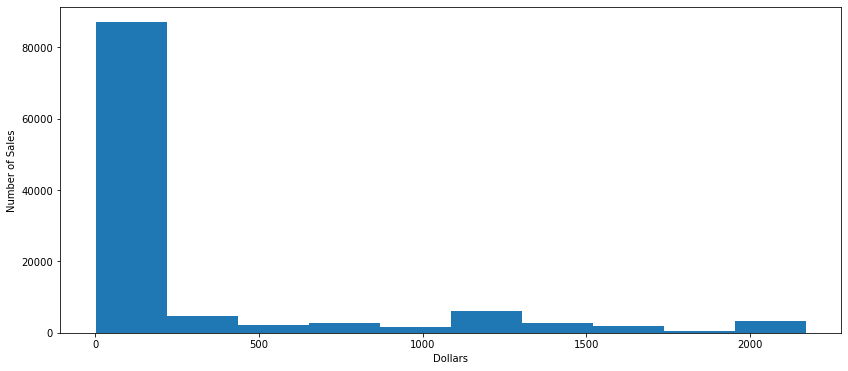

In [13]:
ax = sales['Unit_Cost'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Number of Sales')
ax.set_xlabel('Dollars')

##### Verificando informações pelo Box Plot

###### Infos adicionais: https://statplace.com.br/blog/como-interpretar-um-boxplot/ // https://fernandafperes.com.br/blog/interpretacao-boxplot/

##### Plotando o Density Plot:

<AxesSubplot:ylabel='Density'>

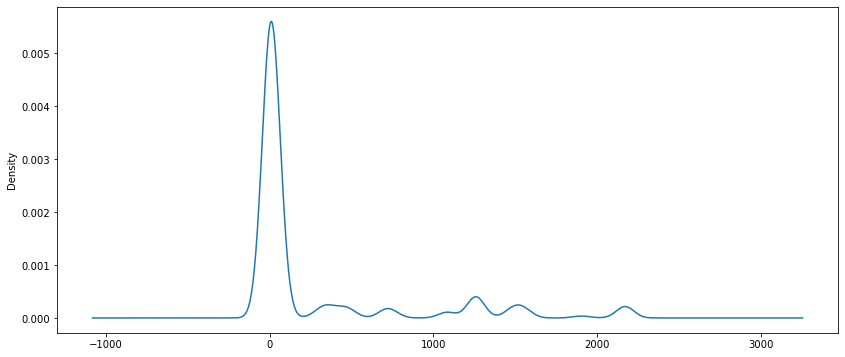

In [14]:
sales['Unit_Cost'].plot(kind='density', figsize=(14,6))

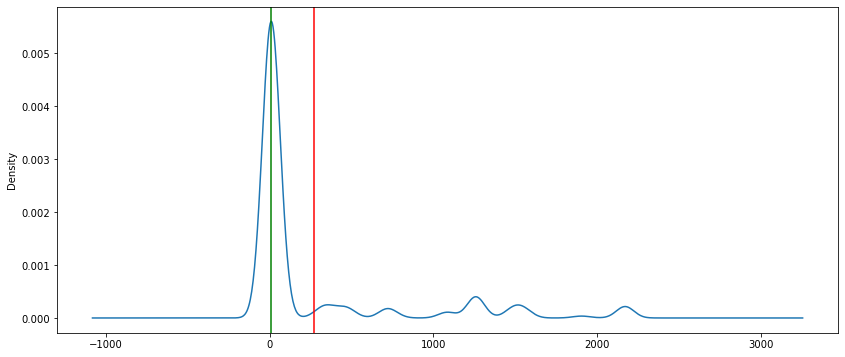

In [15]:
ax = sales['Unit_Cost'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(sales['Unit_Cost'].mean(), color='red')
ax.axvline(sales['Unit_Cost'].median(), color='green')

<AxesSubplot:>

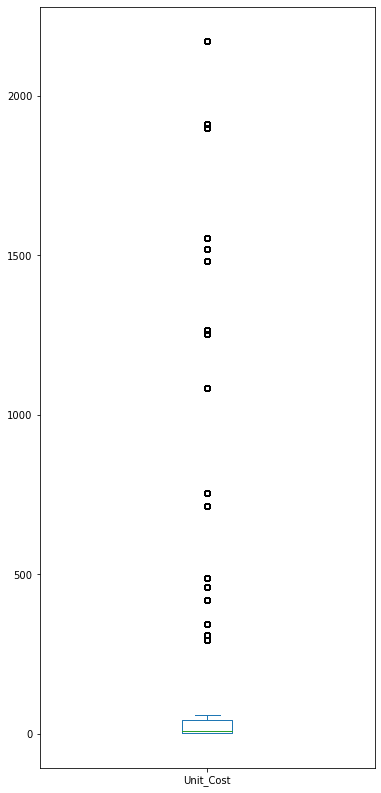

In [16]:
sales['Unit_Cost'].plot(kind='box', vert=True, figsize=(6,14))

<img src="foto/resumo-cinco-numeros-box-plot.jpg">

## Trabalhando com Dados Categóricos

Vamos analisar a coluna : `Age_Group`

In [17]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


##### Mostrando resumo de dados estatísticos (variáveis categóricas) :

In [18]:
sales.describe(include=['object'])

,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
count,113036,113036,113036,113036,113036,113036,113036,113036
unique,12,4,2,6,53,3,17,130
top,June,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,11234,55824,58312,39206,22450,70120,33870,10794


##### Vamos vizualisar agora as categorias de cada coluna categórica :

In [19]:
sales['Age_Group'].value_counts().to_frame()

,Age_Group
Adults (35-64),55824
Young Adults (25-34),38654
Youth (<25),17828
Seniors (64+),730


<AxesSubplot:ylabel='Age_Group'>

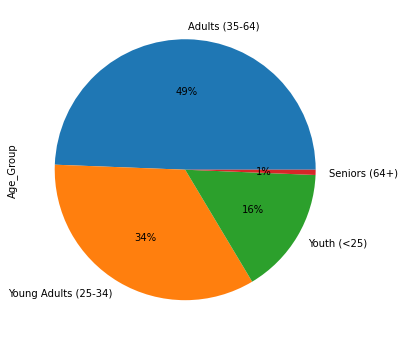

In [20]:
sales['Age_Group'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.0f%%')

Text(0, 0.5, 'Number of Sales')

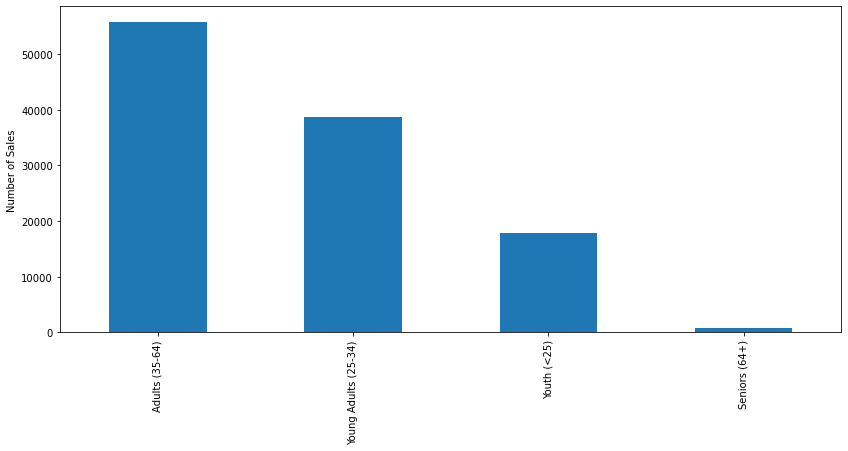

In [21]:
ax = sales['Age_Group'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Sales')

<AxesSubplot:xlabel='Age_Group', ylabel='Revenue'>

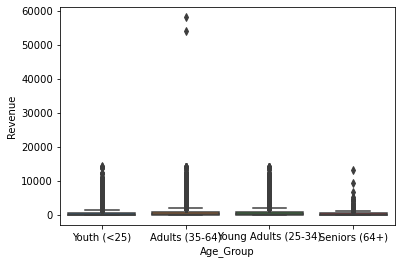

In [22]:
sns.boxplot(x="Age_Group", y="Revenue", data=sales)

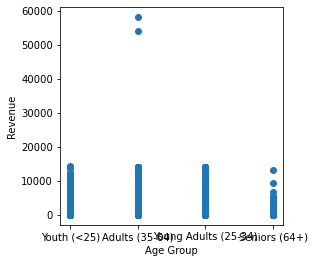

In [23]:
# Scatter plot
fig, ax = plt.subplots(figsize = (4,4))
ax.scatter(sales['Age_Group'], sales['Revenue'])
 
# x-axis label
ax.set_xlabel('Age Group')
 
# y-axis label
ax.set_ylabel('Revenue')
plt.show()

In [24]:
print(np.where(sales['Revenue']>50000))

(array([112072, 112073], dtype=int64),)


In [25]:
from scipy import stats
z = np.abs(stats.zscore(sales['Revenue']))
print(z)
print()
print(np.where(z > 3))

0         0.149440
1         0.149440
2         1.257844
3         1.018746
4         0.256950
            ...   
113031    0.435700
113032    0.327426
113033    0.327426
113034    0.386245
113035    0.345759
Name: Revenue, Length: 113036, dtype: float64

(array([ 49307,  49309,  49311, ..., 112067, 112072, 112073], dtype=int64),)


In [26]:
sales['Customer_Gender'].value_counts().to_frame()

,Customer_Gender
M,58312
F,54724


<AxesSubplot:ylabel='Customer_Gender'>

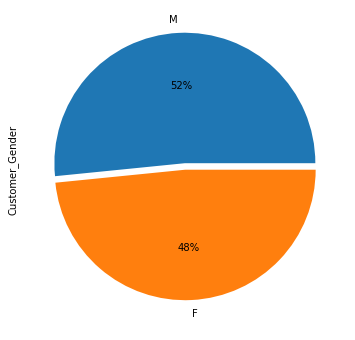

In [27]:
sales['Customer_Gender'].value_counts().plot(kind='pie', figsize=(6,6), explode= [0.05,0], autopct='%1.0f%%')

In [28]:
sales['Country'].value_counts().to_frame()

,Country
United States,39206
Australia,23936
Canada,14178
United Kingdom,13620
Germany,11098
France,10998


<AxesSubplot:ylabel='Country'>

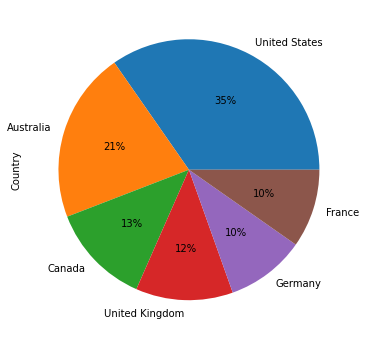

In [29]:
sales['Country'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.0f%%')

In [30]:
sales['State'].value_counts().to_frame()

,State
California,22450
British Columbia,14116
England,13620
Washington,11264
New South Wales,10412
Victoria,6016
Oregon,5286
Queensland,5220
Saarland,2770
Nordrhein-Westfalen,2484


In [31]:
sales['Product_Category'].value_counts().to_frame()

,Product_Category
Accessories,70120
Bikes,25982
Clothing,16934


<AxesSubplot:ylabel='Product_Category'>

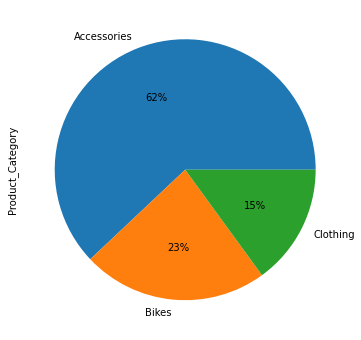

In [32]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6), autopct='%1.0f%%')

In [33]:
sales['Sub_Category'].value_counts().to_frame()

,Sub_Category
Tires and Tubes,33870
Bottles and Cages,15876
Road Bikes,13430
Helmets,12158
Mountain Bikes,8854
Jerseys,6010
Caps,4358
Fenders,4032
Touring Bikes,3698
Gloves,2686


In [34]:
sales['Product'].value_counts().to_frame()

,Product
Water Bottle - 30 oz.,10794
Patch Kit/8 Patches,10416
Mountain Tire Tube,6816
AWC Logo Cap,4358
"Sport-100 Helmet, Red",4220
...,...
"Mountain-100 Silver, 48",58
"Mountain-100 Silver, 42",54
"Mountain-500 Silver, 48",40
"Road-650 Red, 52",32


## Basics of Grouping

In [35]:
sales.groupby('Age_Group')[['Unit_Price','Revenue']].mean()

,Unit_Price,Revenue
Age_Group,,
Adults (35-64),455.185046,762.828765
Seniors (64+),156.260274,421.975342
Young Adults (25-34),489.569928,793.077405
Youth (<25),378.628674,657.572302


In [36]:
sales.groupby("Age_Group")[['Unit_Price',"Revenue"]].aggregate([min,max,sum,'mean'])

Unit_Price                             Revenue         \
                            min   max       sum        mean     min    max   
Age_Group                                                                    
Adults (35-64)                2  3578  25410250  455.185046       2  58074   
Seniors (64+)                 2  3578    114070  156.260274       2  13230   
Young Adults (25-34)          2  3578  18923836  489.569928       2  14169   
Youth (<25)                   2  3578   6750192  378.628674       2  14312   

                                            
                           sum        mean  
Age_Group                                   
Adults (35-64)        42584153  762.828765  
Seniors (64+)           308042  421.975342  
Young Adults (25-34)  30655614  793.077405  
Youth (<25)           11723199  657.572302

In [37]:
sales.groupby("Age_Group")[["Revenue"]].describe()

Revenue                                             \
                        count        mean          std  min   25%    50%   
Age_Group                                                                  
Adults (35-64)        55824.0  762.828765  1316.725395  2.0  66.0  239.0   
Seniors (64+)           730.0  421.975342   885.218576  2.0  47.0  140.0   
Young Adults (25-34)  38654.0  793.077405  1323.501204  2.0  69.0  256.0   
Youth (<25)           17828.0  657.572302  1260.836518  2.0  49.0  139.0   

                                      
                        75%      max  
Age_Group                             
Adults (35-64)        832.0  58074.0  
Seniors (64+)         489.5  13230.0  
Young Adults (25-34)  853.0  14169.0  
Youth (<25)           658.0  14312.0

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Relação entre as colunas

In [38]:
corr = sales.corr()

corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


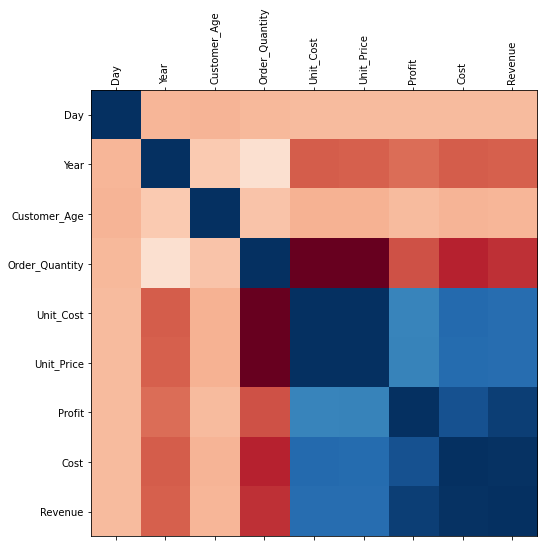

In [39]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

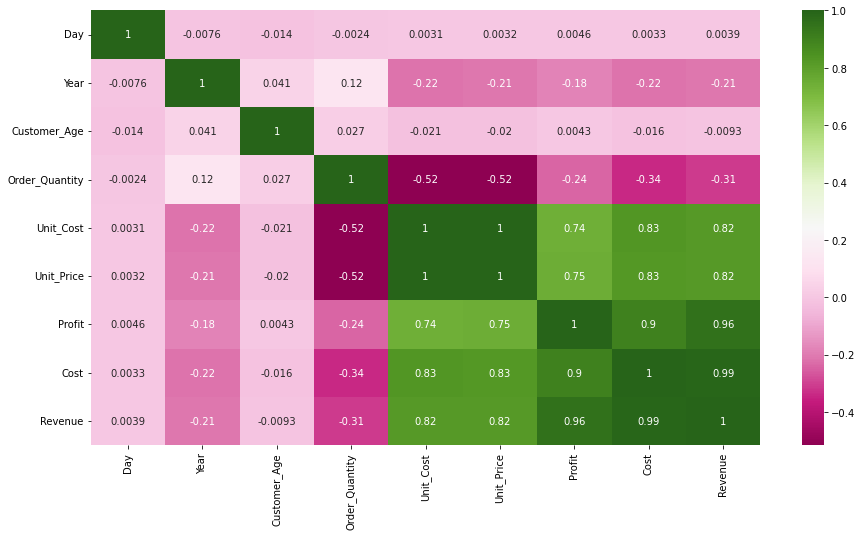

In [40]:
#sns.set(rc = {'figure.figsize':(15,8)}) #definir tamanho SEABORN
plt.figure(figsize = (15,8)) #definir tamanho
sns.heatmap(sales.corr(), annot=True, cmap="PiYG")
plt.show()

<AxesSubplot:xlabel='Customer_Age', ylabel='Revenue'>

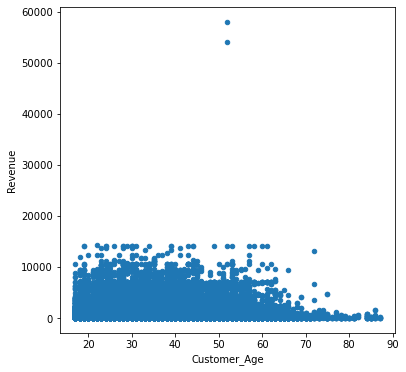

In [41]:
sales.plot(kind='scatter', x='Customer_Age', y='Revenue', figsize=(6,6))

<AxesSubplot:xlabel='Revenue', ylabel='Profit'>

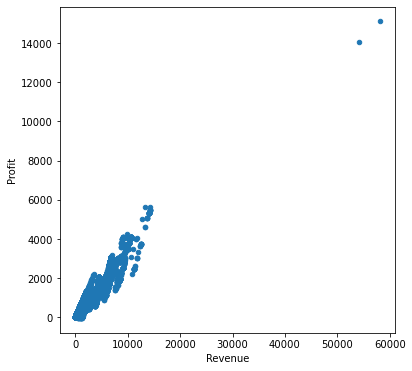

In [42]:
sales.plot(kind='scatter', x='Revenue', y='Profit', figsize=(6,6))

In [43]:
sales[["Revenue", "Profit"]].corr()

,Revenue,Profit
Revenue,1.000000,0.956572
Profit,0.956572,1.000000


Text(0, 0.5, 'Profit')

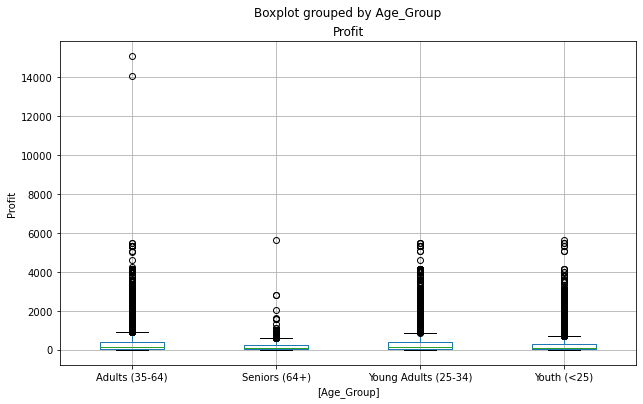

In [44]:
ax = sales[['Profit', 'Age_Group']].boxplot(by='Age_Group', figsize=(10,6))
ax.set_ylabel('Profit')

Year                 AxesSubplot(0.125,0.536818;0.227941x0.343182)
Customer_Age      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Order_Quantity    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
Unit_Cost               AxesSubplot(0.125,0.125;0.227941x0.343182)
Unit_Price           AxesSubplot(0.398529,0.125;0.227941x0.343182)
Profit               AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

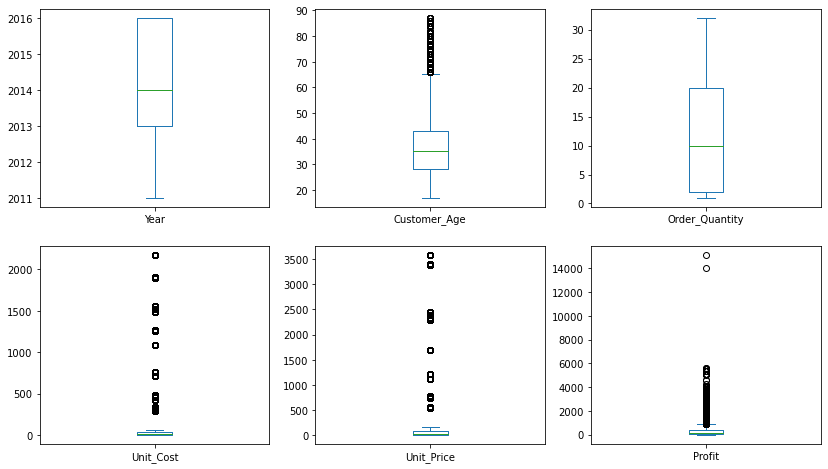

In [45]:
boxplot_cols = ['Year', 'Customer_Age', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit']

sales[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Selection & Indexing:

### Get all the sales made in the state of `Kentucky`

In [46]:
sales.loc[sales['State'] == 'Kentucky']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
156,2013-11-04,4,November,2013,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108
157,2015-11-04,4,November,2015,40,Adults (35-64),M,United States,Kentucky,Accessories,Bike Racks,Hitch Rack - 4-Bike,1,45,120,63,45,108
23826,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,12,8,22,142,96,238
23827,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Fenders,Fender Set - Mountain,14,8,22,165,112,277
31446,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",29,13,35,537,377,914
31447,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Helmets,"Sport-100 Helmet, Blue",31,13,35,574,403,977
79670,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,2,11,30,32,22,54
79671,2014-04-16,16,April,2014,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,21,11,30,336,231,567
79672,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,1,11,30,16,11,27
79673,2016-04-16,16,April,2016,40,Adults (35-64),M,United States,Kentucky,Accessories,Tires and Tubes,ML Mountain Tire,18,11,30,288,198,486


### Get the mean revenue of the `Adults (35-64)` sales group

In [47]:
sales.loc[sales['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

### How many records belong to Age Group `Youth (<25)` or `Adults (35-64)`?

In [48]:
sales.loc[(sales['Age_Group'] == 'Youth (<25)') | (sales['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

### Get the mean revenue of the sales group `Adults (35-64)` in `United States`

In [49]:
sales.loc[(sales['Age_Group'] == 'Adults (35-64)') & (sales['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

### Increase the revenue by 10% to every sale made in France

In [50]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     787
51     787
52    2957
53    2851
60     626
Name: Revenue, dtype: int64

In [51]:
#sales.loc[sales['Country'] == 'France', 'Revenue'] = sales.loc[sales['Country'] == 'France', 'Revenue'] * 1.1

sales.loc[sales['Country'] == 'France', 'Revenue'] *= 1.1

In [52]:
sales.loc[sales['Country'] == 'France', 'Revenue'].head()

50     865.7
51     865.7
52    3252.7
53    3136.1
60     688.6
Name: Revenue, dtype: float64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)